In [387]:
import sys
sys.modules.pop('CLASS_BABY')
sys.modules.pop('CLASS_SAMPLE')


from CLASS_BABY import *
from CLASS_SAMPLE import *

import scipy.stats as ss

#bigger fonts
import matplotlib
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams.update({'font.size': 20})

In [388]:
T = pd.read_csv('../TOST_data/average_properties.txt',
            sep='\t',index_col=0,na_values=-99,
            dtype={'WEIGHT_GRAMS': float,
                   'GEST_AGE_DAYS':float,
                   'DELTA_SEC_MEASURE':float,
                   'MED_SPO2':float,
                   'MED_PI':float,
                   'MED_PR':float,
                   'MEAN_SPO2':float,
                   'MEAN_PI':float,
                   'MEAN_PR':float,
                   'STD_SPO2':float,
                   'STD_PI':float,
                   'STD_PR':float,
                   'BRADY_SEC_PR':float,
                   'BRADY_RATIO_PR':float,
                   'BRADY_RATIO_PR_m10':float,
                   'BRADY_RATIO_PR_m20':float,
                   'BRADY_RATIO_PR_m30':float,
                   'BRADY_RATIO_PR_m40':float,
                   'BRADY_SEC_SPO2':float,
                   'BRADY_RATIO_SPO2':float,
                   'BRADY_SEC_PR_DYN':float,
                   'BRADY_RATIO_PR_DYN':float})

# Function to count episode of bradycardia (to be added to the class baby)

In [389]:
def get_brady_episodes_durations(t,PR, threshold=100, duration_minimum=15,time_step=2):
    '''Output: Return a list containing the duration of the episodes of bradycardia. 
    The length of the list is the number of episodes.
    Input: time (t) and pulse rates measurements (PR). 
    The algorithm can be used in thhe same way for SpO2.
    Parameters: duration_minimum = minimum amount of time in seconds where
    PR below the threshold are considered as an episode of bradycardia. 
    If set to 0, it consider episodes of any duration.
    time_step = difference in seconds between contiguous elements of the vector time (t).'''
    
    episode_durations = []
    contiguous_time_bin = True
    counter_sec = 0

    for i in range(1,len(t)):
        # if in the current and the previous time bin, PR were below threshold  
        if PR[i]< threshold and PR[i-1]< threshold and contiguous_time_bin:
            counter_sec = counter_sec + time_step #sec
            #if I am at the end I need to check the counter 
            # in order not to miss any last episode.
            if i==len(t)-1 and counter_sec>duration_minimum:
                episode_durations.append(counter_sec)
        else:
            # transition from below to above threshold
            if counter_sec > duration_minimum:
                # save the episode
                episode_durations.append(counter_sec)
            #reset the counter for new episode
            counter_sec = 0

        # check that time bins are continuous 
        # without any gap in time 
        if t[i-1] == t[i]-time_step:
            contiguous_time_bin = True
        else:
            contiguous_time_bin = False
    return np.array(episode_durations)

In [390]:
v = ['a','b','c','d','e']
for i in range(1,len(v)):
    print(i)
    
print('len',len(v))

1
2
3
4
len 5


# Let's count the episode of bradycardia in a perfect sin function

In [391]:
x = np.arange(0,180,2)
y = np.sin(x/12+3.8)

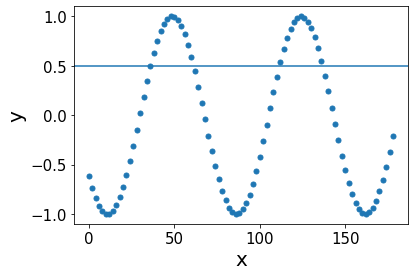

In [392]:
plt.plot(x,y,'.',markersize=10)
#plt.axhline(np.mean(y))
plt.axhline(0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [393]:
#get_brady_episodes_durations(t=x,PR=y,duration_minimum=15,threshold=0.)

In [394]:
get_brady_episodes_durations(t=x,PR=y,duration_minimum=0.,threshold=0.5)

array([36, 48, 40])

In [395]:
#let's check instead when the episodes are less than the duration min
# I should obtain an empty list
get_brady_episodes_durations(t=x,PR=y,duration_minimum=40,threshold=0.5)

array([48])

# Testing on a real baby

In [396]:
B = baby('PLC063',verbose=False)

G_PLC063_Day1_RtWrist_.csv


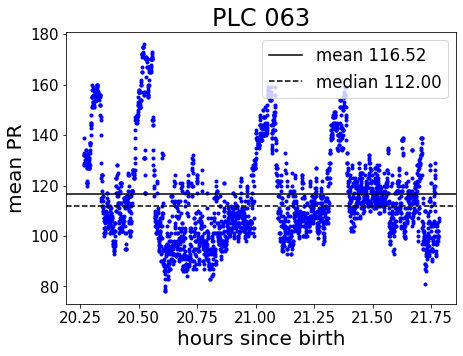

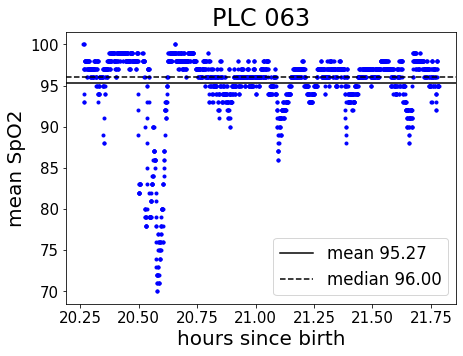

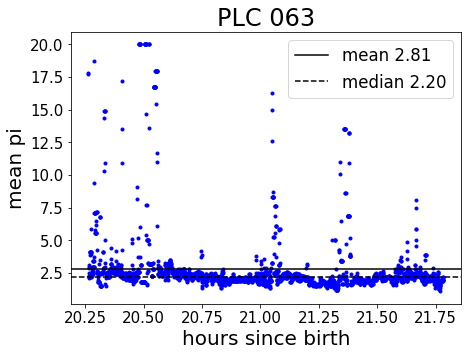

In [397]:
B.plot_baby_measurements(filenumber=1,only_PR=False,with_bad_values=False)

In [398]:
filenumber = 0
time_  = np.array(B.measurements_delta_sec_since_birth_list[filenumber])
pulse_ = np.array(B.measurements[filenumber]['PR'])
spo2_ = np.array(B.measurements[filenumber]['SpO2'])

sel =  np.where(pulse_>10.)
sel_spo2 = np.where(spo2_>10.)

time = time_[sel]
pulse = pulse_[sel]

time_spo2 = time_[sel_spo2]
spo2 = spo2_[sel_spo2]

#thr = (2./3.)*np.median(pulse)
thr = 100.

thr_spo2 = 98.

episodes = get_brady_episodes_durations(t=time,
                                        PR=pulse,
                                        duration_minimum =15,
                                        threshold=thr)

episodes_spo2 = get_brady_episodes_durations(t=time_spo2,
                                        PR=spo2,
                                        duration_minimum =15,
                                        threshold=thr_spo2)
print('############################')
print('####### BABY %s #######'%B.original_name)
print('############################')
print('---------PR-----------------')
print('Threshold = ',thr)#,' (2/3 median)')
print('Duration of episodes in seconds = ',episodes)#/60./60.
print('Number of episodes = ',len(episodes))

print('---------SpO2-----------------')
print('Threshold = ',thr_spo2)#,' (2/3 median)')
print('Duration of episodes in seconds = ',episodes_spo2)#/60./60.
print('Number of episodes = ',len(episodes_spo2))


############################
####### BABY PLC 063 #######
############################
---------PR-----------------
Threshold =  100.0
Duration of episodes in seconds =  [30]
Number of episodes =  1
---------SpO2-----------------
Threshold =  98.0
Duration of episodes in seconds =  [22]
Number of episodes =  1


In [399]:
B.pr_threshold

120.0

In [400]:
B.measurements_bradycardia_episodes_durations[0]

array([208.,  16.,  40.,  84.])

In [401]:
B.measurements_bradycardia_spo2_episodes_durations[0]

array([22.])

In [402]:
B.measurements_bradycardia_episodes_number[0]

4

In [403]:
B.measurements_bradycardia_spo2_episodes_number[0]

1

In [404]:
B.spo2_threshold

98.0

In [405]:
B.pr_threshold

120.0

In [406]:
b=baby('PLC063')

# Counting the number of episodes for all the measurements

In [407]:
brady_epi_num = []
brady_epi_dur = []
brady_epi_num_per_sec = []
brady_spo2_dur = []
brady_spo2_num = []
brady_spo2_num_per_sec = []


for name in np.unique(T['BABY_IDS']):#[0:100]):
    b = baby(name)
    #if b.data_found:
    for i in range(len(b.files)):
        brady_epi_dur.append(b.measurements_bradycardia_episodes_durations[i])
        brady_epi_num.append(b.measurements_bradycardia_episodes_number[i])
        brady_epi_num_per_sec.append(b.measurements_bradycardia_episodes_number_per_sec[i])
        
        brady_spo2_dur.append(b.measurements_bradycardia_spo2_episodes_durations[i])
        brady_spo2_num.append(b.measurements_bradycardia_spo2_episodes_number[i])
        brady_spo2_num_per_sec.append(b.measurements_bradycardia_spo2_episodes_number_per_sec[i])
            

## splitting into wrist and foot

In [340]:
w_brady_epi_num = []
w_brady_epi_dur = []
w_brady_epi_num_per_sec = []
w_brady_spo2_dur = []
w_brady_spo2_num = []
w_brady_spo2_num_per_sec = []

f_brady_epi_num = []
f_brady_epi_dur = []
f_brady_epi_num_per_sec = []
f_brady_spo2_dur = []
f_brady_spo2_num = []
f_brady_spo2_num_per_sec = []



for name in np.unique(T['BABY_IDS']):#[0:100]):
    b = baby(name)
    #if b.data_found:
    for i in range(len(b.files)):
        if b.measurements_wrist[i]==True:
            w_brady_epi_dur.append(b.measurements_bradycardia_episodes_durations[i])
            w_brady_epi_num.append(b.measurements_bradycardia_episodes_number[i])
            w_brady_epi_num_per_sec.append(b.measurements_bradycardia_episodes_number_per_sec[i])

            w_brady_spo2_dur.append(b.measurements_bradycardia_spo2_episodes_durations[i])
            w_brady_spo2_num.append(b.measurements_bradycardia_spo2_episodes_number[i])
            w_brady_spo2_num_per_sec.append(b.measurements_bradycardia_spo2_episodes_number_per_sec[i])
        elif b.measurements_foot[i]==True:
            f_brady_epi_dur.append(b.measurements_bradycardia_episodes_durations[i])
            f_brady_epi_num.append(b.measurements_bradycardia_episodes_number[i])
            f_brady_epi_num_per_sec.append(b.measurements_bradycardia_episodes_number_per_sec[i])

            f_brady_spo2_dur.append(b.measurements_bradycardia_spo2_episodes_durations[i])
            f_brady_spo2_num.append(b.measurements_bradycardia_spo2_episodes_number[i])
            f_brady_spo2_num_per_sec.append(b.measurements_bradycardia_spo2_episodes_number_per_sec[i])

In [341]:
# total
episodes_per_hour_pr = np.array(brady_epi_num_per_sec)*60.*60.
episodes_per_hour_spo2 = np.array(brady_spo2_num_per_sec)*60.*60.
# wrist
w_episodes_per_hour_pr = np.array(w_brady_epi_num_per_sec)*60.*60.
w_episodes_per_hour_spo2 = np.array(w_brady_spo2_num_per_sec)*60.*60.
#foot
f_episodes_per_hour_pr = np.array(f_brady_epi_num_per_sec)*60.*60.
f_episodes_per_hour_spo2 = np.array(f_brady_spo2_num_per_sec)*60.*60.

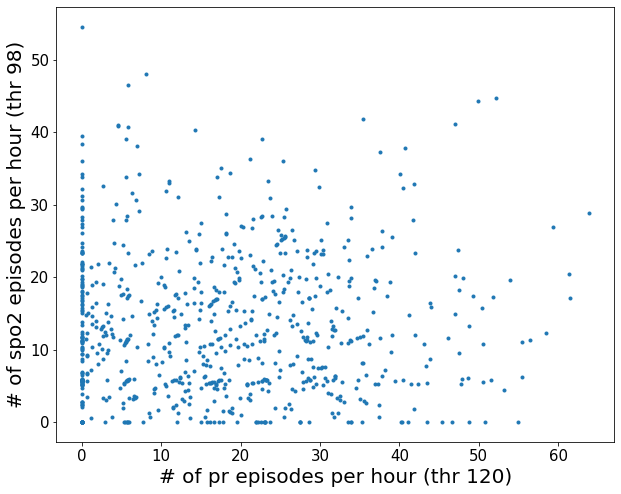

In [339]:
plt.figure(figsize=(10,8))
plt.plot(episodes_per_hour_pr,episodes_per_hour_spo2,".")
plt.xlabel('# of pr episodes per hour (thr 120)')
plt.ylabel('# of spo2 episodes per hour (thr 98)')
plt.show()

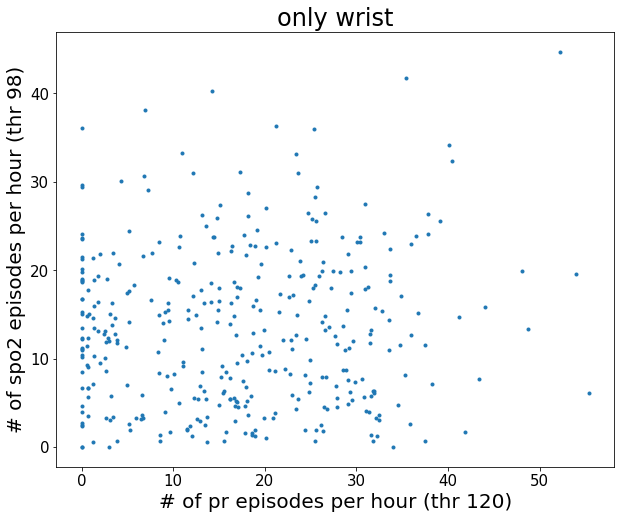

Mean of PR brady episodes per hour (thr 120) wrist 17.06
STD of PR brady episodes per hour (thr 120) wrist 12.12


In [347]:
plt.figure(figsize=(10,8))
plt.title('only wrist')
plt.plot(w_episodes_per_hour_pr,w_episodes_per_hour_spo2,".")
plt.xlabel('# of pr episodes per hour (thr 120)')
plt.ylabel('# of spo2 episodes per hour (thr 98)')
plt.show()

print('Mean of PR brady episodes per hour (thr 120) wrist %.2f'%np.mean(w_episodes_per_hour_pr))
print('STD of PR brady episodes per hour (thr 120) wrist %.2f'%np.std(w_episodes_per_hour_pr))

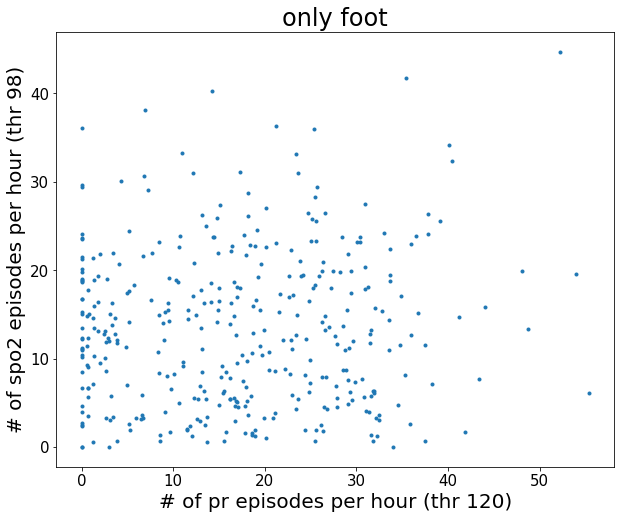

Mean of PR brady episodes per hour (thr 120) foot 18.26
STD of PR brady episodes per hour (thr 120) foot 16.06


In [346]:
plt.figure(figsize=(10,8))
plt.title('only foot')
plt.plot(w_episodes_per_hour_pr,w_episodes_per_hour_spo2,".")
plt.xlabel('# of pr episodes per hour (thr 120)')
plt.ylabel('# of spo2 episodes per hour (thr 98)')
plt.show()

print('Mean of PR brady episodes per hour (thr 120) foot %.2f'%np.mean(f_episodes_per_hour_pr))
print('STD of PR brady episodes per hour (thr 120) foot %.2f'%np.std(f_episodes_per_hour_pr))

In [335]:
def plot_hist(x,y):
    # Set up the axes with gridspec
    fig = plt.figure(figsize=(10, 10))
    grid = plt.GridSpec(4, 4, hspace=1.2, wspace=1.2)
    main_ax = fig.add_subplot(grid[:-1, 1:])
    y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
    x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

    # scatter points on the main axes
    main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

    # histogram on the attached axes
    x_hist.hist(x, 40, histtype='stepfilled',
                orientation='vertical', color='gray')
    x_hist.invert_yaxis()

    y_hist.hist(y, 40, histtype='stepfilled',
                orientation='horizontal', color='gray')
    y_hist.invert_xaxis()
    x_hist.invert_yaxis()
    
    x_hist.set_xlabel('# of pr episodes per hour (thr 120)')
    main_ax.set_ylabel('# of spo2 episodes per hour (thr 98)')

    return fig

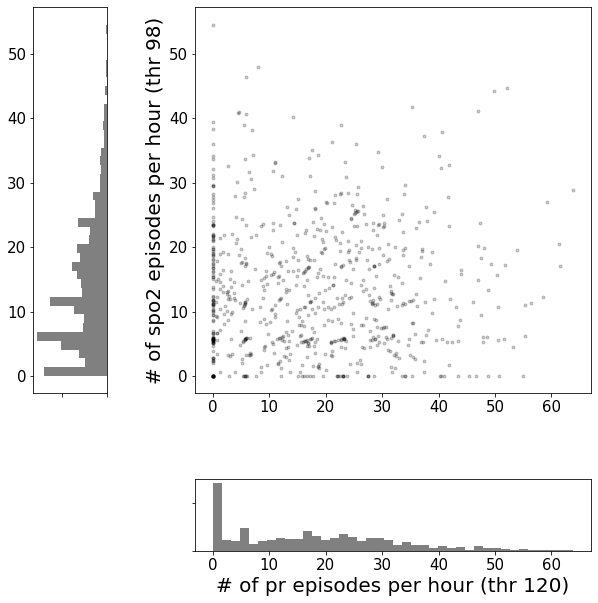

In [336]:
plot_hist(episodes_per_hour_pr,episodes_per_hour_spo2)
plt.show()

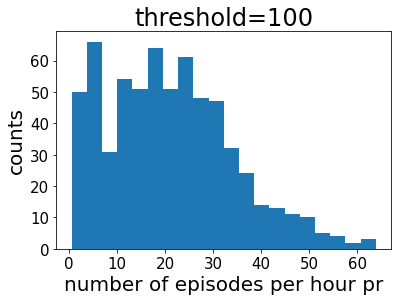

In [362]:
plt.hist(episodes_per_hour_pr[episodes_per_hour_pr!=0.],bins=20)
plt.title('threshold=100')
plt.xlabel('number of episodes per hour pr')
plt.ylabel('counts')
plt.show()

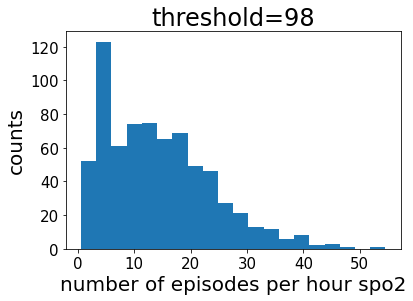

In [363]:
plt.hist(episodes_per_hour_spo2[episodes_per_hour_spo2!=0.],bins=20)
plt.title('threshold=98')
plt.xlabel('number of episodes per hour spo2')
plt.ylabel('counts')
plt.show()

# median duration of episodes (only for duration > 15 sec)

In [365]:
w_dur = []
for i in range(len(w_brady_epi_dur)):
    for j in range(len(w_brady_epi_dur[i])):
        w_dur.append(w_brady_epi_dur[i][j])

In [379]:
f_dur = []
for i in range(len(f_brady_epi_dur)):
    for j in range(len(f_brady_epi_dur[i])):
        f_dur.append(f_brady_epi_dur[i][j])

In [380]:
print('Median duration episodes wrist: %.2f'%np.median(w_dur))
print('IQR duration episodes wrist: %.2f'%ss.iqr(w_dur))

Median duration episodes wrist: 38.00
IQR duration episodes wrist: 52.00


In [381]:
print('Median duration episodes foot: %.2f'%np.median(f_dur))
print('IQR duration episodes foot: %.2f'%ss.iqr(f_dur))

Median duration episodes foot: 36.00
IQR duration episodes foot: 48.00


# Mean - Median as an indication of variabilities in babies

In [257]:
def median_in_bins_err(x,y,x1,x2,nbins,p1=0.25,p2=0.75):
    medians_x = np.zeros(nbins)
    medians_y = np.zeros(nbins)
    err_y_low = np.zeros(nbins)
    err_y_high = np.zeros(nbins)
    x = np.array(x)
    y = np.array(y)
    width = (float(x2)-float(x1))/nbins
    for i in range(int(nbins)):
        x_low = x1 + i*width
        x_high = x1+ (i+1)*width
        #print x_low, x_high
        sel = np.where((x>x_low)&(x<x_high))
        temp_ord = np.copy(y[sel])
        temp_ord = np.sort(temp_ord)
        medians_y[i] = temp_ord[int(len(temp_ord)*0.50 + 0.5)]
        err_y_low[i]  = np.abs(temp_ord[int(len(temp_ord)*p1 + 0.5)]-medians_y[i])
        err_y_high[i]  = np.abs(temp_ord[int(len(temp_ord)*p2 + 0.5)]-medians_y[i])
        #err_y[i] = [err_y_low,err_y_high]
        medians_x[i] = np.median(x[sel])
    return np.array(medians_x),np.array(medians_y),err_y_low,err_y_high

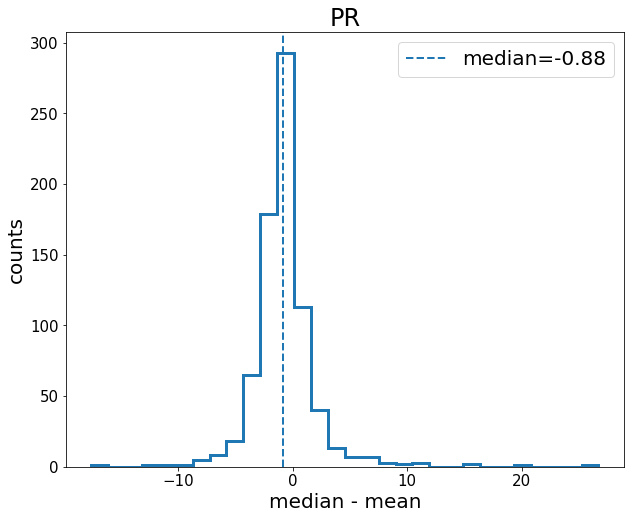

In [352]:
plt.figure(figsize=(10,8))
diff = T['MED_PR']-T['MEAN_PR']
plt.hist(diff,bins=30,histtype='step',lw=3)
plt.axvline(np.median(diff),ls='dashed',lw=2,label='median=%.2f'%np.median(diff))
plt.xlabel('median - mean')
plt.ylabel('counts')
plt.title('PR')
plt.legend()
plt.show()

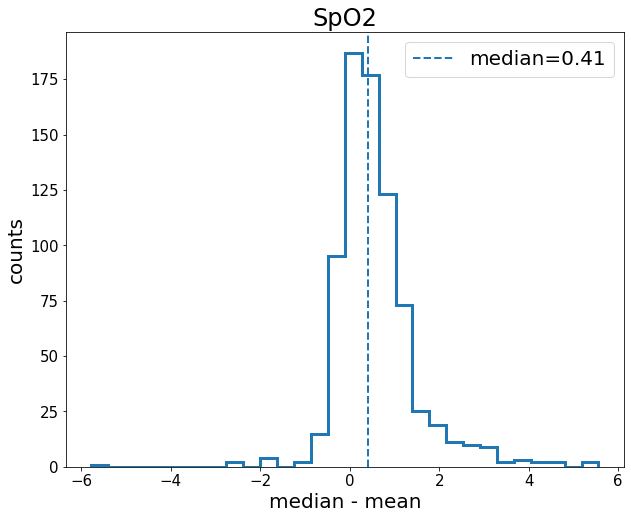

In [351]:
plt.figure(figsize=(10,8))
diff_spo2 = T['MED_SPO2']-T['MEAN_SPO2']
plt.hist(diff,bins=30,histtype='step',lw=3)
plt.axvline(np.median(diff_spo2),ls='dashed',lw=2,label='median=%.2f'%np.median(diff))
plt.xlabel('median - mean')
plt.ylabel('counts')
plt.title('SpO2')
plt.legend()
plt.show()

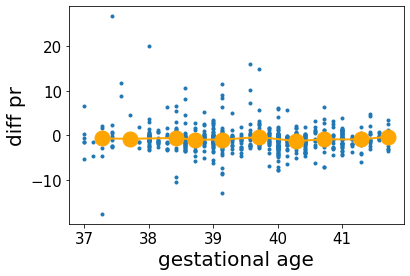

In [356]:
x = T['GEST_AGE_DAYS']/7.
y = diff
plt.plot(x,y,".")
xx,yy,ey1,ey2 = median_in_bins_err(x,y,37,42,10)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='orange',label ='median')
plt.plot(xx,yy,color="orange",lw=2)
plt.xlabel('gestational age')
plt.ylabel('diff pr')

plt.show()


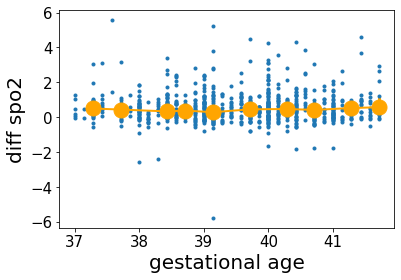

In [357]:
x = T['GEST_AGE_DAYS']/7.
y = diff_spo2
plt.plot(x,y,".")
xx,yy,ey1,ey2 = median_in_bins_err(x,y,37,42,10)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='orange',label ='median')
plt.plot(xx,yy,color="orange",lw=2)
plt.xlabel('gestational age')
plt.ylabel('diff spo2')
plt.show()


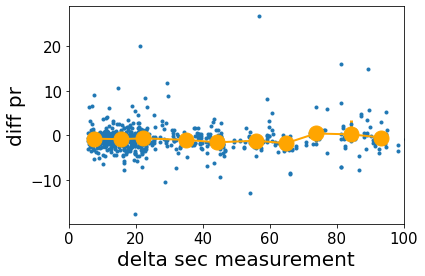

In [358]:
x = T['DELTA_SEC_MEASURE']/60./60.
y = diff 
plt.plot(x,y,".")
xx,yy,ey1,ey2 = median_in_bins_err(x,y,0,100,10)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='orange',label ='median')
plt.plot(xx,yy,color="orange",lw=2)
plt.xlim(0,100)
plt.xlabel('delta sec measurement')
plt.ylabel('diff pr')

plt.show()


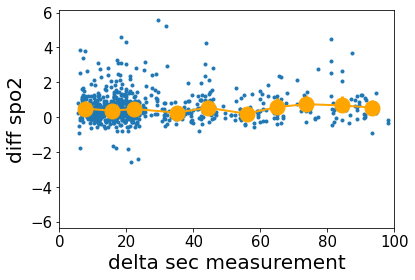

In [360]:
x = T['DELTA_SEC_MEASURE']/60./60.
y = diff_spo2
plt.plot(x,y,".")
xx,yy,ey1,ey2 = median_in_bins_err(x,y,0,100,10)
plt.errorbar(xx,yy,yerr=[ey1,ey2],fmt=".",markersize=30,elinewidth=3,color='orange',label ='median')
plt.plot(xx,yy,color="orange",lw=2)
plt.xlim(0,100)
plt.xlabel('delta sec measurement')
plt.ylabel('diff spo2')
plt.show()


In [261]:
T.columns.values

array(['BABY_IDS', 'GENDER', 'WEIGHT_GRAMS', 'GEST_AGE_DAYS', 'DELIVERY',
       'BIRTH_DATE', 'FILE', 'DELTA_SEC_MEASURE', 'MED_SPO2', 'MED_PR',
       'MED_PI', 'MEAN_SPO2', 'MEAN_PR', 'MEAN_PI', 'STD_SPO2', 'STD_PR',
       'STD_PI', 'PHN', 'WRIST', 'FOOT', 'BRADY_SEC_PR', 'BRADY_RATIO_PR',
       'BRADY_RATIO_PR_m10', 'BRADY_RATIO_PR_m20', 'BRADY_RATIO_PR_m30',
       'BRADY_RATIO_PR_m40', 'BRADY_SEC_SPO2', 'BRADY_RATIO_SPO2',
       'BRADY_SEC_PR_DYN', 'BRADY_RATIO_PR_DYN'], dtype=object)

# PI

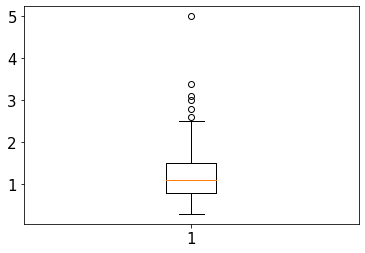

In [372]:
plt.boxplot(T['MED_PI'][T['MED_PI']>0.])
plt.show()